Responsabilidades:
- Implementar en Python/MATLAB el modelo simbólico de la función de transferencia en lazo abierto L(s).
- Verificar que el numerador y denominador cumplan con lo especificado.
- Graficar el Lugar Geométrico de las Raíces con valores iniciales de Ti = τ y Td = τ/10.
- Identificar el recorrido de los polos al variar Kp.

Entregables:
- Código con control.matlab o control de Python.
- Gráfica del LGR.
- Captura/análisis de comportamiento de los polos.
trial

In [3]:
! pip install control matplotlib numpy ipywidgets 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 728.7 kB/s eta 0:00:03
   --------- ------------------------------ 0.5/2.2 MB 728.7 kB/s eta 0:00:03
   -------------- ------------------------- 0.8/2.2 MB 710.3 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 710.3 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.2 MB 708.4 kB/s eta 0:00:02
   ----------------------- ---------------- 1.3/2.2 MB 710.6 kB/s eta 0:00:02
   ----------------------- ---------------- 1.3/2.2 MB 710.6 kB/s eta 0:00:02
   ---------------------------- ----------- 1.6/2.2 MB 704.3 kB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


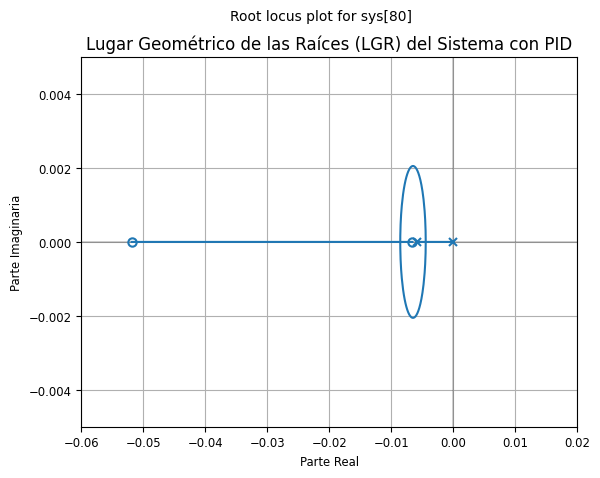

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import sympy as sp
from ipywidgets import interact, FloatSlider

# Parámetros de la planta (ejemplo - usar valores reales de su sistema)
def simulacion(K=0):
            # Ganancia de la planta
    tau = 171   # Constante de tiempo de la planta (segundos)

    # Parámetros provisionales del PID
    Ti = tau      # Tiempo integral = constante de tiempo de la planta
    Td = tau/10   # Tiempo derivativo = 10% de la constante de tiempo

    # Definir la función de transferencia en lazo abierto
    num = [K*Ti*Td, K*Ti, K]
    den = [Ti*tau, Ti, 0]
    L = ctrl.TransferFunction(num, den)

    # Graficar el LGR

    ctrl.root_locus(L, grid=False)
    plt.title('Lugar Geométrico de las Raíces (LGR) del Sistema con PID')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.gca().set_aspect('auto')
    plt.xlim(-0.06, 0.02)
    plt.ylim(-0.005, 0.005)
    plt.grid(True)
    plt.show()
simulacion(1.0)  # Llamada inicial para mostrar el gráfico
